In [2]:
from pycbc import distributions
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from pycbc.catalog import Merger
import pylab

In [4]:
bbh_events = ['GW150914',
              'GW151012',
              'GW151226',
              'GW170104',
              'GW170608',
              'GW170729',
              'GW170809',
              'GW170814',
              'GW170818',
              'GW170823',
              'GW190408_181802',
              'GW190412',              
              'GW190413_052954',
              'GW190413_134308',
              'GW190421_213856',
              'GW190424_180648',
              'GW190425',
              'GW190503_185404',
              'GW190512_180714',
              'GW190513_205428',
              'GW190514_065416',
              'GW190517_055101',
              'GW190519_153544',
              'GW190521',
              'GW190521_074359',
              'GW190527_092055',
              'GW190602_175927',
              'GW190620_030421',
              'GW190630_185205',
              'GW190701_203306',
              'GW190706_222641',
              'GW190707_093326',
              'GW190708_232457',
              'GW190719_215514',
              'GW190720_000836',
              'GW190727_060333',
              'GW190728_064510',
              'GW190731_140936',
              'GW190803_022701',
              'GW190814',
              'GW190828_063405',
              'GW190828_065509',
              'GW190909_114149',
              'GW190910_112807',
              'GW190915_235702',
              'GW190924_021846',
              'GW190929_012149',
              'GW190930_133541']

In [ ]:
for i in tqdm(range(len(bbh_events))):

    gps = event_gps(bbh_events[i])
    start = int(gps) - 15
    end = int(gps) + 15

    data = TimeSeries.fetch_open_data('L1', start, end)

    data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Original signals/"+bbh_events[i]+".txt")    

    data = TimeSeries.to_pycbc(data)
    data = data.whiten(4, 4)
    data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Processed signals/"+bbh_events[i]+".txt")    
    

In [5]:
# Merging data Templates into single file

path = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Original signals/"
files= os.listdir(path)
f = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Original_BBH_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/48 [00:00<?, ?it/s]

In [6]:
# Merging data Templates into single file

path = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Processed signals/"
files= os.listdir(path)
f = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Processed_BBH_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/47 [00:00<?, ?it/s]

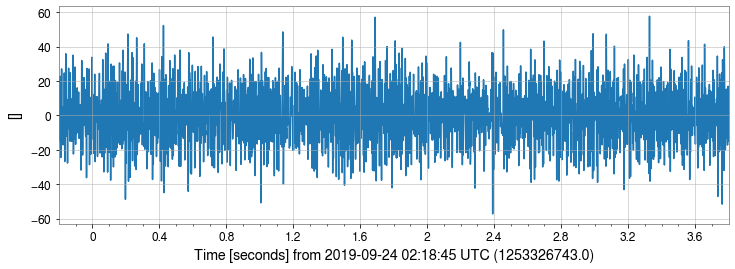

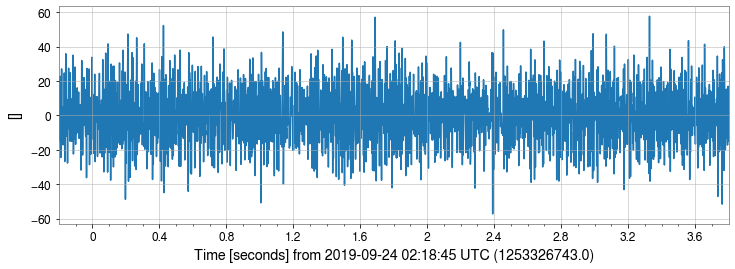

In [10]:
i = 45
data = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Processed signals/"+bbh_events[i]+".txt")
data.plot()

In [64]:
# for i in tqdm(range(len(bbh_events))):

    # gps = event_gps(bbh_events[i])
    # start = int(gps) - 2
    # end = int(gps) + 2

    # data = TimeSeries.fetch_open_data('L1', start, end)
#     data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Original signals/"+bbh_events[i]+".txt")    

In [ ]:
# for i in tqdm(range(len(bbh_events))):

#     m = Merger(bbh_events[i])
#     data = m.strain('L1')

#     data1 = TimeSeries.from_pycbc(data)
#     data1.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Original signals/"+bbh_events[i]+".txt")    

#     data = data.whiten(4, 4)
#     data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
#     data = data.time_slice(m.time - 2, m.time + 2)
#     data = TimeSeries.from_pycbc(data)
    
#     data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/Processed signals/"+bbh_events[i]+".txt")    
    

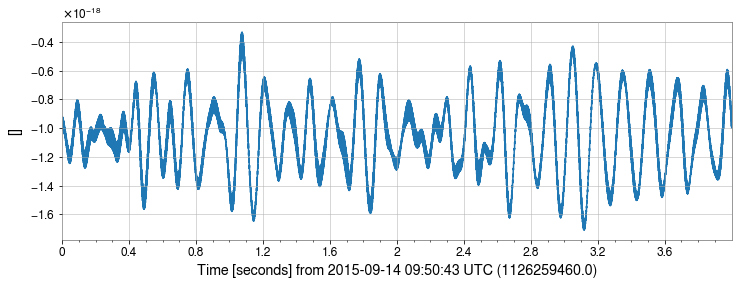

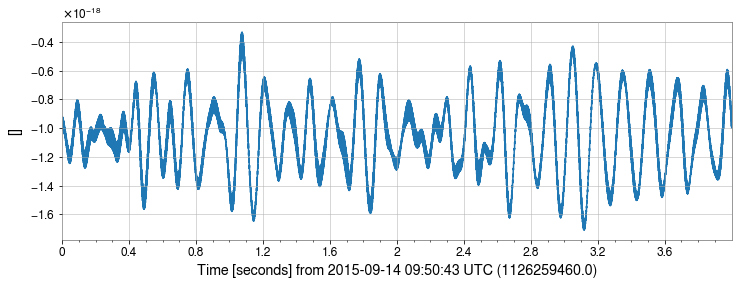

In [7]:
gps = event_gps("GW150914")
start = int(gps) - 2
end = int(gps) + 2
data = TimeSeries.fetch_open_data('L1', start, end)
data.plot()

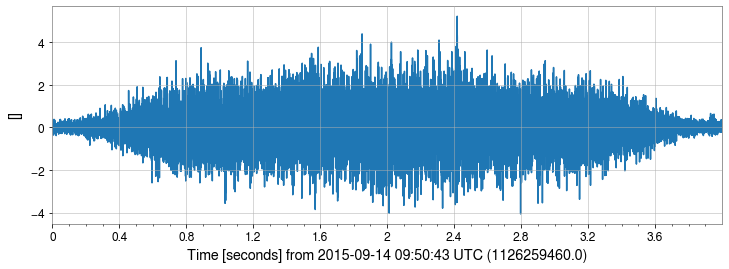

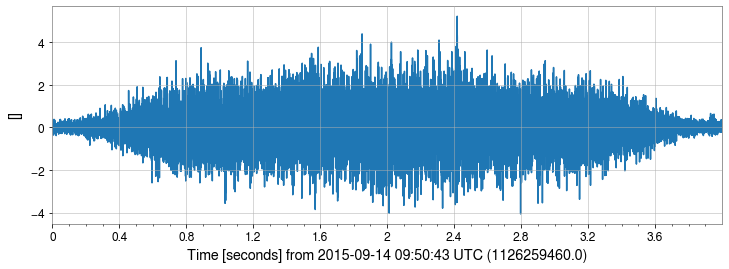

In [9]:
white = data.whiten()
white.plot()